In [31]:
import os, shutil
first_dataset_dir = '../datasets/train1'
second_dataset_dir = '../datasets/train2'
third_dataset_dir = '../datasets/train3'
fourth_dataset_dir = '../datasets/train4'
fifth_dataset_dir = '../datasets/train5'
test_dataset_dir = '../datasets/test'

In [32]:
from keras.utils import image_dataset_from_directory
IMG_SIZE = 224

train_ds1 = image_dataset_from_directory(first_dataset_dir, image_size=(IMG_SIZE, IMG_SIZE), batch_size=32, label_mode='categorical')
# 6 % 5 + 1 = 2
val_ds2 = image_dataset_from_directory(second_dataset_dir, image_size=(IMG_SIZE, IMG_SIZE), batch_size=32, label_mode='categorical')
train_ds3 = image_dataset_from_directory(third_dataset_dir, image_size=(IMG_SIZE, IMG_SIZE), batch_size=32, label_mode='categorical')
train_ds4 = image_dataset_from_directory(fourth_dataset_dir, image_size=(IMG_SIZE, IMG_SIZE), batch_size=32, label_mode='categorical')
train_ds5 = image_dataset_from_directory(fifth_dataset_dir, image_size=(IMG_SIZE, IMG_SIZE), batch_size=32, label_mode='categorical')
test_ds = image_dataset_from_directory(test_dataset_dir, image_size=(IMG_SIZE, IMG_SIZE), batch_size=32, label_mode='categorical')

Found 10000 files belonging to 10 classes.
Found 10000 files belonging to 10 classes.
Found 10000 files belonging to 10 classes.
Found 10000 files belonging to 10 classes.
Found 10000 files belonging to 10 classes.
Found 10000 files belonging to 10 classes.


In [33]:
print (type(train_ds1))
print (train_ds1.class_names)

full_train_ds = train_ds1.concatenate(train_ds3).concatenate(train_ds4).concatenate(train_ds5)

# Even if we switch datatypes back to the original
# Methods like class_names are not available
# So we keep it as "concatenated dataset" instead of "prefetch dataset"
# full_train_ds = full_train_ds.prefetch(buffer_size=tf.data.AUTOTUNE)
# print (full_train_ds.class_names)
print (type(full_train_ds))

<class 'tensorflow.python.data.ops.prefetch_op._PrefetchDataset'>
['000_airplane', '001_automobile', '002_bird', '003_cat', '004_deer', '005_dog', '006_frog', '007_horse', '008_ship', '009_truck']
<class 'tensorflow.python.data.ops.concatenate_op._ConcatenateDataset'>


In [34]:
for data_batch, labels_batch in full_train_ds:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (32, 224, 224, 3)
labels batch shape: (32, 10)


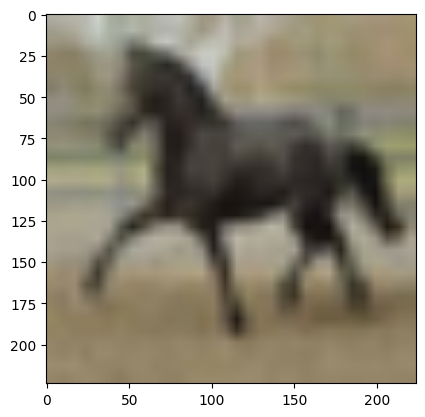

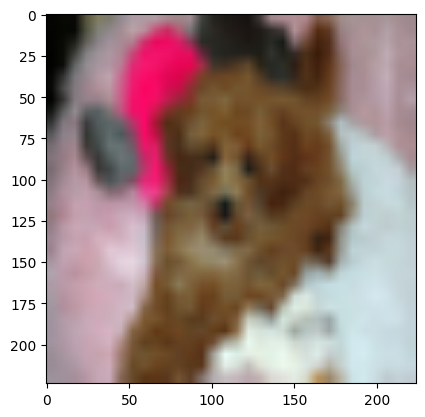

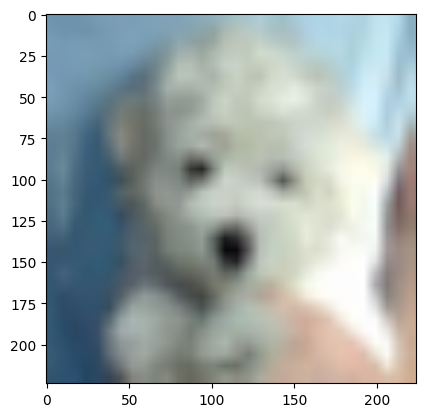

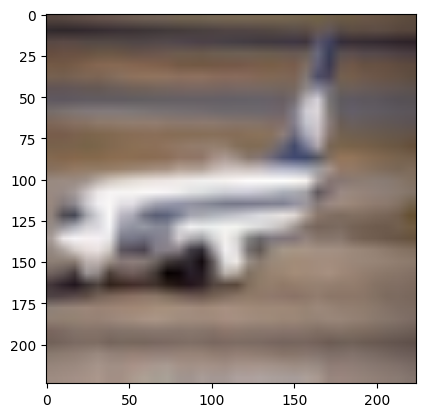

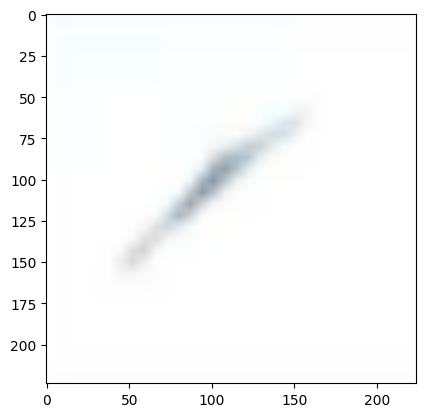

In [37]:
import matplotlib.pyplot as plt
for data_batch, _ in full_train_ds.take(1):
  for i in range(5):
    plt.imshow(data_batch[i].numpy().astype("uint8"))
    plt.show()

In [38]:
from tensorflow.keras.applications.vgg16 import VGG16
#conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
#conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))
# testar resnet50

In [39]:
from tensorflow import keras
import numpy as np
def get_features_and_labels(dataset):
  all_features = []
  all_labels = []
  for images, labels in dataset:
    preprocessed_images = keras.applications.vgg16.preprocess_input(images)
    features = conv_base.predict(preprocessed_images)
    all_features.append(features)
    all_labels.append(labels)
  return np.concatenate(all_features), np.concatenate(all_labels)

In [40]:
train_features, train_labels = get_features_and_labels(full_train_ds)
val_features, val_labels = get_features_and_labels(val_ds2)
test_features, test_labels = get_features_and_labels(test_ds)

1/1 [==============================] - 5s 5s/step


KeyboardInterrupt: 

In [42]:
from tensorflow import keras 
from keras import layers
#inputs = keras.Input(shape=(4, 4, 512)) 
#inputs = keras.Input(shape=(1, 1, 512)) 
inputs = keras.Input(shape=(3, 3, 512)) 
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
# testar mais camadas densas 
#outputs = layers.Dense(1, activation="sigmoid")(x) 
outputs = layers.Dense(10, activation="softmax")(x) 
model = keras.Model(inputs, outputs)

In [43]:
model.compile( 
  loss='categorical_crossentropy', 
  optimizer='rmsprop', 
  metrics=['accuracy']
)
history = model.fit(
  train_features, train_labels,
  epochs=20,
  validation_data=(val_features, val_labels)
)

Epoch 1/20
1250/1250 [==============================] - 5s 4ms/step - loss: 8.9355 - accuracy: 0.7612 - val_loss: 3.3552 - val_accuracy: 0.8244
Epoch 2/20
1250/1250 [==============================] - 4s 4ms/step - loss: 3.1207 - accuracy: 0.8074 - val_loss: 2.2034 - val_accuracy: 0.8231
Epoch 3/20
1250/1250 [==============================] - 4s 4ms/step - loss: 2.3208 - accuracy: 0.8192 - val_loss: 2.2393 - val_accuracy: 0.8248
Epoch 4/20
1250/1250 [==============================] - 4s 4ms/step - loss: 2.1404 - accuracy: 0.8317 - val_loss: 2.6788 - val_accuracy: 0.8213
Epoch 5/20
1250/1250 [==============================] - 4s 4ms/step - loss: 2.1201 - accuracy: 0.8397 - val_loss: 2.5488 - val_accuracy: 0.8316
Epoch 6/20
1250/1250 [==============================] - 4s 3ms/step - loss: 2.1646 - accuracy: 0.8468 - val_loss: 2.6747 - val_accuracy: 0.8331
Epoch 7/20
1250/1250 [==============================] - 4s 4ms/step - loss: 2.1684 - accuracy: 0.8533 - val_loss: 3.1911 - val_accuracy:

Best resul for binary_crossentropy found in epoch 8: loss: 0.2686 - accuracy: 0.8505 - val_loss: 0.2588 - val_accuracy: 0.8417

Best results for categorical_crossentropy: loss: 2.2785 - accuracy: 0.9069 - val_loss: 6.6384 - val_accuracy: 0.8416

In [44]:
model.compile( 
  loss='categorical_crossentropy', 
  optimizer='adam', 
  metrics=['accuracy']
)
history = model.fit(
  train_features, train_labels,
  epochs=20,
  validation_data=(val_features, val_labels)
)

Epoch 1/20
1250/1250 [==============================] - 4s 3ms/step - loss: 3.0115 - accuracy: 0.8898 - val_loss: 7.7090 - val_accuracy: 0.8332
Epoch 2/20
1250/1250 [==============================] - 4s 3ms/step - loss: 3.0295 - accuracy: 0.8919 - val_loss: 7.3114 - val_accuracy: 0.8355
Epoch 3/20
1250/1250 [==============================] - 3s 3ms/step - loss: 3.0221 - accuracy: 0.8948 - val_loss: 8.2548 - val_accuracy: 0.8287
Epoch 4/20
1250/1250 [==============================] - 3s 3ms/step - loss: 3.0029 - accuracy: 0.8990 - val_loss: 8.8819 - val_accuracy: 0.8278
Epoch 5/20
1250/1250 [==============================] - 3s 3ms/step - loss: 3.0011 - accuracy: 0.9029 - val_loss: 8.5649 - val_accuracy: 0.8336
Epoch 6/20
1250/1250 [==============================] - 3s 3ms/step - loss: 3.0762 - accuracy: 0.9013 - val_loss: 9.4770 - val_accuracy: 0.8305
Epoch 7/20
1250/1250 [==============================] - 3s 2ms/step - loss: 3.0334 - accuracy: 0.9062 - val_loss: 9.8013 - val_accuracy: